# Important - Instructions
**Make a copy of this notebook and do your work there. Save your notebook frequently and finally upload it on coderbyte within the timelimit.**

This notebook is divided into three sections, each dedicated to solving a specific task involving an autoencoder for the MNIST dataset. The tasks include fixing training issues, optimizing performance, and generating images.

At the end of each secion, briefly summarise what ideas/methods/changes (even those that you think didn't work) you've done for the section very briefly. This shouldn't take you more than ~5 minutes of your whole time.

# Overview of the tasks:
- **Fix Errors in Autoencoder Training/Inference:** Resolve any bugs in the training or inference process of the autoencoder.
- **Enhance Validation Loss:** Improve the autoencoder's performance by minimizing the validation loss.
- **Generate Images with the Optimized Model:** Use the best-trained model to generate images.

# Guidelines:
- **Imports:** Use only the imports already provided in the notebook. Any new import statements will be removed during evaluation.
- **Protected Code:** Certain cells are marked with # DO NOT MODIFY. Leave the code in these cells unchanged, but you may run the code.
- **Efficiency:** Ensure your solutions are written with efficiency in mind wherever applicable.

# Setup
You just have to run the code in this section

In [1]:
! pip install torch torchvision --index-url https://download.pytorch.org/whl/cpu
! pip install gdown

Looking in indexes: https://download.pytorch.org/whl/cpu


In [1]:
# DO NOT MODIFY
import os
import matplotlib.pyplot as plt
import numpy as np
import random
import torch
import time
from numpy.typing import NDArray
from torch import nn, optim
from torch.utils.data import DataLoader
from tqdm import tqdm


def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True

seed_everything()

In [2]:
# DO NOT MODIFY
import gdown

os.makedirs("data", exist_ok=True)

mnist_train_file_id = "1JMd32keTqqUAofWRPBnIg9PpusJD8mYt"
mnist_train_output = "data/mnist_dataset_train.pt"  # Desired filename for the downloaded file

mnist_test_file_id = "1OG8mBivCdXBwH8uCMvjWnVhHFtRagmSU"
mnist_test_output = "data/mnist_dataset_test.pt"  # Desired filename for the downloaded file

# Download the file
gdown.download(f"https://drive.google.com/uc?id={mnist_train_file_id}", mnist_train_output, quiet=False)
gdown.download(f"https://drive.google.com/uc?id={mnist_test_file_id}", mnist_test_output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1JMd32keTqqUAofWRPBnIg9PpusJD8mYt
From (redirected): https://drive.google.com/uc?id=1JMd32keTqqUAofWRPBnIg9PpusJD8mYt&confirm=t&uuid=e3f199fd-9497-4f04-9859-73184e02d6af
To: /content/data/mnist_dataset_train.pt
100%|██████████| 47.5M/47.5M [00:00<00:00, 77.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OG8mBivCdXBwH8uCMvjWnVhHFtRagmSU
To: /content/data/mnist_dataset_test.pt
100%|██████████| 7.92M/7.92M [00:00<00:00, 132MB/s]


'data/mnist_dataset_test.pt'

In [ ]:
# DO NOT MODIFY
import gdown
file_id = "1v_-Gq58ee7w2WM977O4qXCiLhhGRwHVb"
output = "advanced_autoencoder_model.pth"  # Desired filename for the downloaded file

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

def load_pretrained_model():
  model = torch.load("advanced_autoencoder_model.pth")
  model.eval()
  return model

# Section 1 - Fix autoencoder training
 This section doesn't require you to write a lot of code,  rather requires your attention to the details of standard ML training and inference.

**Expected time on this section: 20 minutes**<br>
**Maximum time on this section: 30 minutes**

In this section, you are given an AutoEncoder implementation along with code to train this model on reconstruction of MNIST images.

If you run the code as is, you will observe the visualisation doesn't work as expected. Your task is to figure out the bugs and fix them.

You know you have resolved the bugs if loss decreases considerably within 2 epochs and you are able to visualise non-trivial images reconstructed by the autoencoder (code for visualisation is provided at the end of this section).

In [17]:
# DO NOT MODIFY
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32)
        )
        self.decoder = nn.Sequential(
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 28 * 28),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [34]:
model = Autoencoder()
#criterion = nn.BCEWithLogitsLoss()
#fix the loss function
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [35]:
def toTensor(x):
  #return torch.from_numpy(np.array(x)).float()
  #normalize to [0,1]
  return torch.from_numpy(np.array(x)).float()/255.0

In [36]:
train_dataset = torch.load('data/mnist_dataset_train.pt')
train_dataset.transform = toTensor

test_dataset = torch.load('data/mnist_dataset_test.pt')
test_dataset.transform = toTensor

<ipython-input-36-2b50a8a45dff>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_dataset = torch.load('data/mnist_dataset_train.pt')
<ipython-input-36-2b50a8a45dff>:4:

Epoch 1:   1%|          | 7/938 [00:00<00:14, 62.71it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:   2%|▏         | 22/938 [00:00<00:13, 67.61it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:   4%|▍         | 36/938 [00:00<00:13, 65.50it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:   5%|▌         | 50/938 [00:00<00:13, 63.52it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:   7%|▋         | 64/938 [00:00<00:13, 65.31it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:   8%|▊         | 78/938 [00:01<00:13, 64.84it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  10%|▉         | 92/938 [00:01<00:13, 64.17it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  11%|█▏        | 106/938 [00:01<00:12, 65.21it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
loss: 0.3967507481575012
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.S

Epoch 1:  13%|█▎        | 120/938 [00:01<00:13, 61.87it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  14%|█▍        | 135/938 [00:02<00:12, 65.89it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  16%|█▌        | 150/938 [00:02<00:11, 67.01it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  17%|█▋        | 164/938 [00:02<00:11, 66.78it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  19%|█▉        | 178/938 [00:02<00:11, 67.03it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  20%|██        | 192/938 [00:02<00:11, 64.97it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  22%|██▏       | 206/938 [00:03<00:11, 64.01it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  23%|██▎       | 214/938 [00:03<00:10, 65.83it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  24%|██▍       | 229/938 [00:03<00:10, 64.94it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  26%|██▌       | 243/938 [00:03<00:10, 66.17it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  27%|██▋       | 257/938 [00:03<00:10, 61.91it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  28%|██▊       | 264/938 [00:04<00:14, 46.97it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  29%|██▉       | 270/938 [00:04<00:16, 40.34it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  30%|██▉       | 280/938 [00:04<00:16, 39.68it/s]


outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
out

Epoch 1:  30%|███       | 286/938 [00:04<00:14, 43.51it/s]

outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  32%|███▏      | 296/938 [00:05<00:14, 43.51it/s]

outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  33%|███▎      | 306/938 [00:05<00:14, 44.54it/s]

loss: 0.26225945353507996
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.

Epoch 1:  34%|███▍      | 317/938 [00:05<00:13, 46.40it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  35%|███▍      | 327/938 [00:05<00:12, 47.09it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  36%|███▌      | 337/938 [00:05<00:13, 43.48it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  37%|███▋      | 347/938 [00:06<00:13, 44.78it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  38%|███▊      | 357/938 [00:06<00:12, 45.68it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  39%|███▉      | 367/938 [00:06<00:12, 46.00it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  40%|███▉      | 372/938 [00:06<00:12, 43.91it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  41%|████      | 382/938 [00:06<00:13, 42.35it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  42%|████▏     | 392/938 [00:07<00:13, 41.89it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  43%|████▎     | 402/938 [00:07<00:12, 42.13it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  43%|████▎     | 407/938 [00:07<00:12, 42.60it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  44%|████▍     | 417/938 [00:07<00:12, 42.51it/s]


outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
out

Epoch 1:  46%|████▌     | 429/938 [00:07<00:10, 48.64it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  47%|████▋     | 443/938 [00:08<00:08, 58.15it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  49%|████▊     | 457/938 [00:08<00:07, 61.21it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  50%|█████     | 471/938 [00:08<00:07, 63.51it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  52%|█████▏    | 485/938 [00:08<00:07, 62.72it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  53%|█████▎    | 500/938 [00:09<00:06, 66.23it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  55%|█████▍    | 514/938 [00:09<00:06, 67.38it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  56%|█████▋    | 528/938 [00:09<00:06, 65.99it/s]

outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  58%|█████▊    | 542/938 [00:09<00:05, 67.08it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  59%|█████▉    | 556/938 [00:09<00:05, 64.20it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  61%|██████    | 570/938 [00:10<00:05, 64.13it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  62%|██████▏   | 585/938 [00:10<00:05, 68.01it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  64%|██████▍   | 599/938 [00:10<00:05, 66.02it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  65%|██████▌   | 613/938 [00:10<00:05, 62.60it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  67%|██████▋   | 627/938 [00:11<00:04, 64.60it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  68%|██████▊   | 641/938 [00:11<00:04, 66.10it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  70%|██████▉   | 655/938 [00:11<00:04, 66.23it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  71%|███████   | 662/938 [00:11<00:04, 62.22it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  72%|███████▏  | 676/938 [00:11<00:04, 57.48it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  73%|███████▎  | 689/938 [00:12<00:04, 57.92it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  75%|███████▍  | 702/938 [00:12<00:03, 59.14it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  76%|███████▌  | 714/938 [00:12<00:03, 58.82it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  77%|███████▋  | 726/938 [00:12<00:03, 57.69it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  79%|███████▉  | 739/938 [00:12<00:03, 57.11it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  80%|████████  | 752/938 [00:13<00:03, 59.21it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  82%|████████▏ | 765/938 [00:13<00:02, 61.16it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  82%|████████▏ | 772/938 [00:13<00:02, 60.83it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  84%|████████▍ | 786/938 [00:13<00:02, 59.23it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  85%|████████▌ | 799/938 [00:13<00:02, 58.36it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  87%|████████▋ | 813/938 [00:14<00:02, 60.39it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  88%|████████▊ | 827/938 [00:14<00:01, 62.08it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  90%|████████▉ | 841/938 [00:14<00:01, 59.97it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  91%|█████████ | 854/938 [00:14<00:01, 58.63it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  92%|█████████▏| 861/938 [00:14<00:01, 59.96it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  93%|█████████▎| 875/938 [00:15<00:01, 61.22it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  95%|█████████▍| 889/938 [00:15<00:00, 63.09it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  96%|█████████▋| 903/938 [00:15<00:00, 60.52it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
loss

Epoch 1:  98%|█████████▊| 917/938 [00:15<00:00, 58.95it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1:  99%|█████████▉| 930/938 [00:16<00:00, 60.59it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 1: 100%|██████████| 938/938 [00:16<00:00, 57.73it/s]


outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:   0%|          | 0/938 [00:00<?, ?it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:   1%|          | 6/938 [00:00<00:16, 57.01it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:   1%|▏         | 12/938 [00:00<00:16, 56.49it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:   2%|▏         | 18/938 [00:00<00:16, 54.81it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:   3%|▎         | 25/938 [00:00<00:16, 54.90it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:   3%|▎         | 31/938 [00:00<00:17, 51.46it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:   4%|▍         | 37/938 [00:00<00:16, 53.40it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:   5%|▍         | 44/938 [00:00<00:15, 56.51it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:   6%|▌         | 58/938 [00:01<00:14, 59.44it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:   7%|▋         | 70/938 [00:01<00:15, 56.00it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:   9%|▊         | 82/938 [00:01<00:15, 56.78it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:   9%|▉         | 88/938 [00:01<00:16, 52.39it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  10%|█         | 94/938 [00:01<00:17, 49.29it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  11%|█         | 100/938 [00:01<00:17, 46.94it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
loss: 0.24852260947227478
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.

Epoch 2:  11%|█         | 105/938 [00:02<00:19, 42.90it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  12%|█▏        | 110/938 [00:02<00:19, 42.87it/s]


outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  12%|█▏        | 115/938 [00:02<00:18, 43.36it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  13%|█▎        | 120/938 [00:02<00:18, 43.11it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  13%|█▎        | 125/938 [00:02<00:18, 43.18it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  14%|█▍        | 130/938 [00:02<00:20, 39.55it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])

Epoch 2:  14%|█▍        | 135/938 [00:02<00:20, 39.79it/s]


outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  15%|█▍        | 140/938 [00:02<00:20, 39.84it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  15%|█▌        | 145/938 [00:03<00:19, 40.03it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  16%|█▌        | 150/938 [00:03<00:19, 40.68it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  17%|█▋        | 155/938 [00:03<00:18, 41.23it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  17%|█▋        | 160/938 [00:03<00:19, 40.58it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  18%|█▊        | 165/938 [00:03<00:19, 39.00it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  18%|█▊        | 169/938 [00:03<00:20, 38.10it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  18%|█▊        | 173/938 [00:03<00:20, 36.79it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  19%|█▉        | 178/938 [00:03<00:20, 38.00it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  20%|█▉        | 183/938 [00:03<00:19, 39.40it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  20%|██        | 188/938 [00:04<00:18, 40.24it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  21%|██        | 193/938 [00:04<00:19, 39.17it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  21%|██▏       | 201/938 [00:04<00:19, 36.93it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
loss: 0.25660619139671326
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.

Epoch 2:  22%|██▏       | 209/938 [00:04<00:19, 36.89it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  23%|██▎       | 218/938 [00:04<00:19, 37.14it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  24%|██▍       | 229/938 [00:05<00:15, 45.25it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  25%|██▌       | 235/938 [00:05<00:14, 49.23it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  26%|██▌       | 242/938 [00:05<00:13, 52.74it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  26%|██▋       | 248/938 [00:05<00:13, 52.87it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  27%|██▋       | 254/938 [00:05<00:13, 52.11it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  28%|██▊       | 260/938 [00:05<00:12, 53.73it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  28%|██▊       | 266/938 [00:05<00:12, 53.96it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  29%|██▉       | 273/938 [00:05<00:11, 56.82it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  30%|██▉       | 279/938 [00:06<00:11, 57.34it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])


Epoch 2:  30%|███       | 286/938 [00:06<00:10, 59.63it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  32%|███▏      | 300/938 [00:06<00:10, 60.25it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  33%|███▎      | 313/938 [00:06<00:10, 57.89it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  35%|███▍      | 326/938 [00:06<00:10, 59.25it/s]

outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  36%|███▌      | 338/938 [00:07<00:10, 58.62it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  38%|███▊      | 352/938 [00:07<00:09, 60.65it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  39%|███▉      | 366/938 [00:07<00:09, 59.49it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  40%|███▉      | 372/938 [00:07<00:09, 58.10it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  41%|████      | 386/938 [00:07<00:09, 58.64it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  43%|████▎     | 399/938 [00:08<00:09, 59.86it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  44%|████▍     | 413/938 [00:08<00:08, 62.19it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  46%|████▌     | 427/938 [00:08<00:08, 57.93it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  46%|████▋     | 434/938 [00:08<00:08, 59.38it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  48%|████▊     | 448/938 [00:08<00:08, 60.08it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  49%|████▉     | 462/938 [00:09<00:07, 60.48it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  51%|█████     | 476/938 [00:09<00:07, 60.93it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  52%|█████▏    | 490/938 [00:09<00:07, 58.91it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  53%|█████▎    | 497/938 [00:09<00:07, 60.02it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  54%|█████▍    | 511/938 [00:09<00:06, 62.24it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  56%|█████▌    | 525/938 [00:10<00:06, 61.99it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  57%|█████▋    | 539/938 [00:10<00:06, 62.48it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  59%|█████▉    | 553/938 [00:10<00:06, 60.68it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  60%|██████    | 567/938 [00:10<00:06, 61.35it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  61%|██████    | 574/938 [00:10<00:05, 61.56it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  63%|██████▎   | 588/938 [00:11<00:05, 61.84it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  64%|██████▍   | 602/938 [00:11<00:05, 61.44it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
loss: 0.2328600138425827
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.S

Epoch 2:  66%|██████▌   | 615/938 [00:11<00:05, 58.12it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  67%|██████▋   | 629/938 [00:11<00:05, 61.12it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  69%|██████▊   | 643/938 [00:12<00:04, 60.39it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  70%|███████   | 657/938 [00:12<00:04, 60.54it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  71%|███████   | 664/938 [00:12<00:04, 59.44it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  72%|███████▏  | 677/938 [00:12<00:04, 58.47it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  74%|███████▍  | 697/938 [00:12<00:03, 60.65it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  75%|███████▌  | 704/938 [00:13<00:03, 58.90it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
loss: 0.2409420758485794
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.S

Epoch 2:  77%|███████▋  | 718/938 [00:13<00:03, 60.73it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  78%|███████▊  | 731/938 [00:13<00:03, 56.72it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  79%|███████▉  | 743/938 [00:13<00:03, 57.78it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  81%|████████  | 756/938 [00:13<00:03, 59.45it/s]


outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
out

Epoch 2:  82%|████████▏ | 769/938 [00:14<00:02, 59.58it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  83%|████████▎ | 782/938 [00:14<00:02, 59.56it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  85%|████████▍ | 795/938 [00:14<00:02, 58.71it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  86%|████████▌ | 808/938 [00:14<00:02, 60.56it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
loss: 0.2603624165058136
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.S

Epoch 2:  87%|████████▋ | 815/938 [00:14<00:02, 61.03it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  88%|████████▊ | 828/938 [00:15<00:02, 49.50it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  89%|████████▉ | 834/938 [00:15<00:02, 46.16it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  90%|████████▉ | 844/938 [00:15<00:02, 43.91it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  91%|█████████ | 854/938 [00:15<00:01, 43.29it/s]

outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  92%|█████████▏| 859/938 [00:16<00:01, 43.00it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  93%|█████████▎| 869/938 [00:16<00:01, 39.61it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  94%|█████████▎| 879/938 [00:16<00:01, 40.58it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  95%|█████████▍| 889/938 [00:16<00:01, 43.18it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  96%|█████████▌| 899/938 [00:16<00:00, 45.27it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  97%|█████████▋| 909/938 [00:17<00:00, 43.39it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  98%|█████████▊| 919/938 [00:17<00:00, 42.69it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2:  99%|█████████▊| 924/938 [00:17<00:00, 40.42it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2: 100%|█████████▉| 934/938 [00:17<00:00, 41.45it/s]

outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outp

Epoch 2: 100%|██████████| 938/938 [00:17<00:00, 52.22it/s]



outputs shape: torch.Size([64, 1, 28, 28]), inputs shape: torch.Size([64, 1, 28, 28])
outputs shape: torch.Size([32, 784]), inputs shape: torch.Size([32, 1, 28, 28])
outputs shape: torch.Size([32, 1, 28, 28]), inputs shape: torch.Size([32, 1, 28, 28])


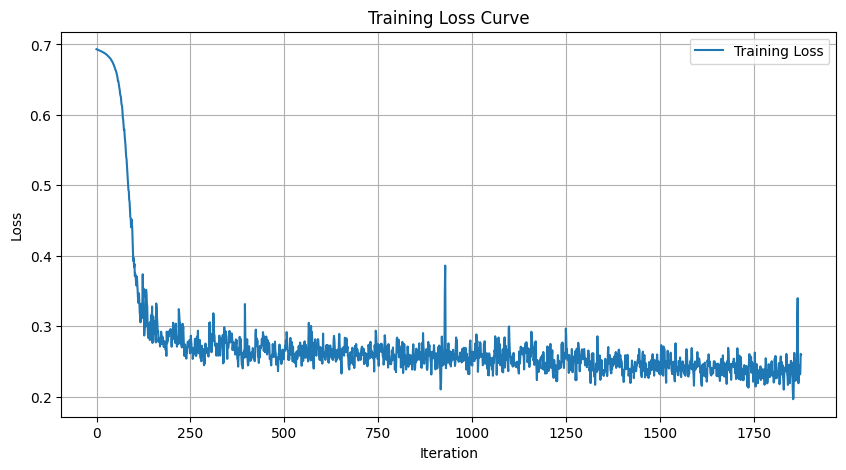

In [37]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=False)

# Lists to store loss values for plotting
train_losses = []

# Training Loop
for epoch in range(2):
    model.train()
    for i, (inputs, _) in enumerate(tqdm(train_loader, desc=f"Epoch {epoch + 1}")):
        #chanel dimension to match the output shape
        inputs = inputs.unsqueeze(1)

        outputs = model(inputs)
        #compare the reconstructed output to input
        #loss = criterion(outputs.reshape_as(inputs), inputs)

        #check shapes
        print(f'outputs shape: {outputs.shape}, inputs shape: {inputs.shape}')

        #outputs shape: torch.Size([64, 784]), inputs shape: torch.Size([64, 28, 28]) and that makes the two not match
        #reshape the output to match the input
        outputs=outputs.view(-1,1,28,28)

        #print the reshaped output size
        print(f'outputs shape: {outputs.shape}, inputs shape: {inputs.shape}')


        loss = criterion(outputs, inputs)
        #reset the gradient of the model param to zero
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        train_losses.append(loss.item()) # Store loss for plotting
        if (i + 1) % 100 == 0:
            print(f"loss: {loss.item()}")


# Plotting the loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

In [38]:
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
model.eval()
test_inputs = []
test_outputs = []
for inputs, _ in test_loader:
    outputs = model(inputs)
    test_inputs.append(inputs.detach().cpu().numpy())
    test_outputs.append(outputs.reshape_as(inputs).detach().cpu().numpy())

In [39]:
# DO NOT MODIFY
# Convert lists of tensors to numpy arrays
test_inputs = np.concatenate(test_inputs)
test_outputs = np.concatenate(test_outputs)

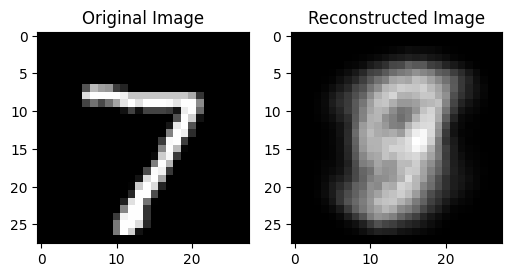

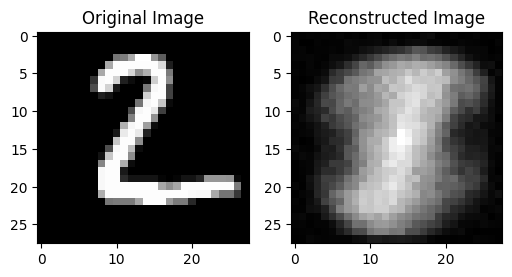

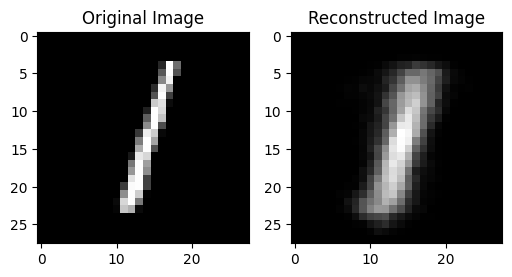

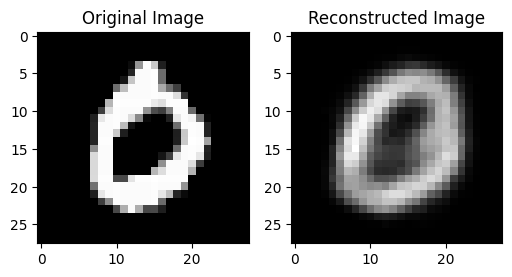

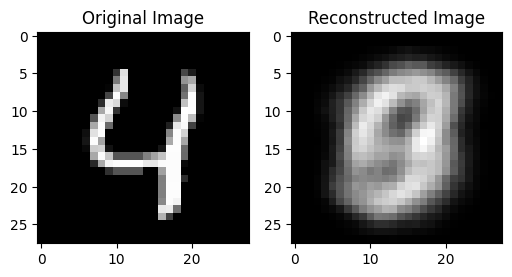

In [40]:
# DO NOT MODIFY
num_images = 5

for i in range(num_images):
    plt.figure(figsize=(6, 3))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(test_inputs[i, :, :], cmap="gray")
    plt.title("Original Image")

    # Reconstructed image
    plt.subplot(1, 2, 2)
    plt.imshow(test_outputs[i, :, :], cmap="gray")
    plt.title("Reconstructed Image")

    plt.show()

## Summary
*Briefly summarize your work for section 1 here*

The first bug that catches my attention was the loss function during the model building.I had to change it to BCE as it works well with sigmoid activation.

Second bug was the reconstruction and the comparison, that was changed to fit output vs inputs.

By changing this, I encountered errors around value missmatch which was literatlly shapes of the output and the inputs. I tried debugging by printing the shapes of the output and the input.

In addition, I had to work around the input shape as well by using the unsqueeze to make sure the input shape aligns well with that of the output.

Comments were added to the codes and previous codes were commented out


# Section 2 - Improve the model

 *This section is more open-ended and less like the previous section.*

 **Expected time on this section: 30 minutes**<br>
**Maximum time on this section: 45 minutes**<br>

 In this section, you have to improve the model's performance by making changes to the training code to reduce the validation loss further. You are free to write your own autoencoder implementation in the AdvancedAutoencoder class, or use the same implementation from above.
Don't constraint yourself in this section! There are many ways to improve performance and you should feel free to try creative solutions. If the validation loss and corresponding visualization looks good to you, you can move to section 3 (and come back later to optimize the loss further if you want). If you are not able to achieve sufficiently low loss, then use our provided weights for section 3, otherwise use your own model. We provided a helper function for you to check if your validation loss is lower than the loss with our provided model's weights.

 Note:
 - We have written code to check the forward pass of your model doesn't exceed 0.05 seconds on a single batch. Make sure this condition is always satisfied.
 - You also need to implement your own `random_split` function.
 - One obvious thing one might do is to make the latent space dimension equal to the input dimension to achieve perfect zero loss. But this is not an autoencoder as it is not compressing the information. So latent space dimension should be fixed (=32) and should be not be "tuned".

 Also, feel free to reuse the code from previous section to get started.

In [67]:
class AdvancedAutoencoder(nn.Module):
  def __init__(self, latent_dim=32):
    """Make sure encoder compresses the image to a 32-dimensional latent vector."""
    super(AdvancedAutoencoder, self).__init__()

    #Encoder
    self.encoder = nn.Sequential(
        nn.Flatten(),
        nn.Linear(28 * 28, 128),
        nn.ReLU(),
        nn.Linear(128, 64),
        nn.ReLU(),
        nn.Linear(64, latent_dim)
    )

    #decoder
    self.decoder = nn.Sequential(
        nn.Linear(latent_dim, 64),
        nn.ReLU(),
        nn.Linear(64, 128),
        nn.ReLU(),
        nn.Linear(128, 28 * 28),
        nn.Sigmoid(),
        nn.Unflatten(1, (28, 28))
    )


  def forward(self, x):
    x = self.encoder(x)
    x = self.decoder(x)
    return x

In [68]:
# DO NOT MODIFY
model = AdvancedAutoencoder()
max_allowed_time = 0.05  # seconds

# Measure time for the forward pass
i, (inputs, _) = next(enumerate(train_loader))
start_time = time.time()
output = model(inputs)
end_time = time.time()

# Measure once again, time for the forward pass
i, (inputs, _) = next(enumerate(train_loader))
start_time = time.time()
output = model(inputs)
end_time = time.time()

elapsed_time = end_time - start_time

# Assert the time constraint
assert elapsed_time <= max_allowed_time, f"Forward pass exceeded time limit! Took {elapsed_time:.8f} seconds"
print(f"Forward pass took {elapsed_time:.8f} seconds")

Forward pass took 0.00209260 seconds


In [69]:
def random_split(dataset, lengths):
  '''
  TODO: Implement this function from scratch using torch/numpy operations.
  Splits randomly a given dataset into two datasets,
  consisting of the specified lengths.
  '''
  if sum(lengths) != len(dataset):
    raise ValueError("Sum of lengths must be equal to the length of the dataset")

  #randomly shuffle indices
  indices = torch.randperm(len(dataset)).tolist()

  #split into two dataset
  split1_indices = indices[:lengths[0]]
  split2_indices = indices[lengths[0]:]

  return torch.utils.data.Subset(dataset, split1_indices), torch.utils.data.Subset(dataset, split2_indices)
  #return torch.utils.data.random_split(dataset, lengths)

In [70]:
# Calculate split sizes
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size

# Split the dataset
train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_subset, batch_size=64, shuffle=False)

In [71]:
# TODO: train your model and calculate validation loss (val_loss)
def train_autoencoder(model,train_loader,val_loader,num_epoch=10,learning_rate=0.001):
  criterion = nn.BCELoss()
  optimizer = optim.Adam(model.parameters(), lr=learning_rate)
  train_losses = []
  val_losses = []
  for epoch in range(num_epoch):

    #training
    model.train()
    train_loss=0
    for batch in train_loader:
      inputs = batch[0]
      #inputs = inputs.unsqueeze(1)
      outputs = model(inputs)
      loss = criterion(outputs, inputs)
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()
      train_loss += loss.item()
      train_loss/=len(train_loader)
    #validation
    model.eval()
    val_loss=0
    with torch.no_grad():
      for batch in val_loader:
        inputs = batch[0]
        #inputs = inputs.unsqueeze(1)
        outputs = model(inputs)
        loss = criterion(outputs, inputs)
        val_loss += loss.item()
        val_loss/=len(val_loader)
    train_losses.append(train_loss)
    val_losses.append(val_loss)
  return val_loss

In [72]:
# DO NOT MODIFY
def check_loss_lower_than_reference_loss(your_val_loss)  -> bool:
  reference_loss = 0.0927
  assert your_val_loss < reference_loss, "Your validation loss is higher than our pretrained model's loss"

In [73]:
# TODO: verify your loss is lower than our reference loss
#check_loss_lower_than_reference_loss(None)

In [74]:
if __name__=="__main__":

  # Load train and test datasets with correct paths
  train_dataset = torch.load('data/mnist_dataset_train.pt')
  test_dataset = torch.load('data/mnist_dataset_test.pt')
  train_dataset.transform = toTensor
  test_dataset.transform = toTensor

  # Calculate split sizes
  train_size = int(0.8 * len(train_dataset))
  val_size = len(train_dataset) - train_size

  # Split the dataset using random_split
  train_subset, val_subset = random_split(train_dataset, [train_size, val_size])

  # Create DataLoaders using the subsets
  train_loader = DataLoader(train_subset, batch_size=64, shuffle=True)
  val_loader = DataLoader(val_subset, batch_size=64, shuffle=False)

  model = AdvancedAutoencoder()
  val_loss = train_autoencoder(model,train_loader,val_loader)
  print(f"Validation Loss: {val_loss}")
  check_loss_lower_than_reference_loss(val_loss)

<ipython-input-74-f5b19574e794>:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  train_dataset = torch.load('data/mnist_dataset_train.pt')
<ipython-input-74-f5b19574e794>:5:

Validation Loss: 0.000560450456496517


In [76]:
print(check_loss_lower_than_reference_loss(val_loss))

None


In [77]:
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)
model.eval()
test_inputs = []
test_outputs = []
for inputs, _ in test_loader:
    outputs = model(inputs)
    test_inputs.append(inputs.detach().cpu().numpy())
    test_outputs.append(outputs.reshape_as(inputs).detach().cpu().numpy())

In [78]:
# DO NOT MODIFY
# Convert lists of tensors to numpy arrays
test_inputs = np.concatenate(test_inputs)
test_outputs = np.concatenate(test_outputs)

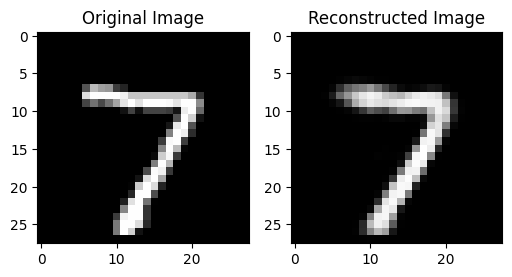

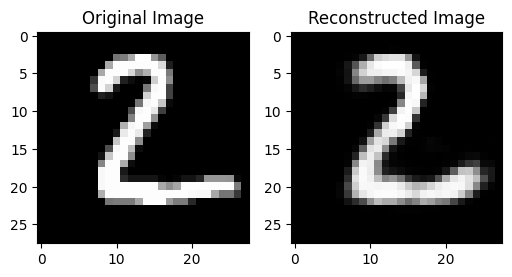

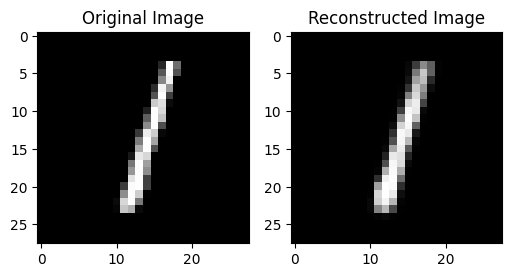

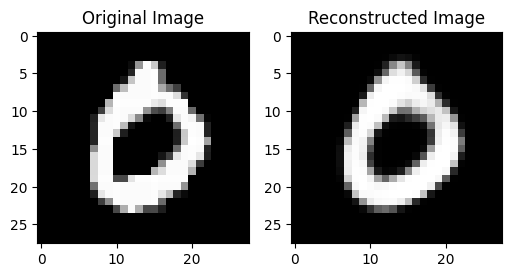

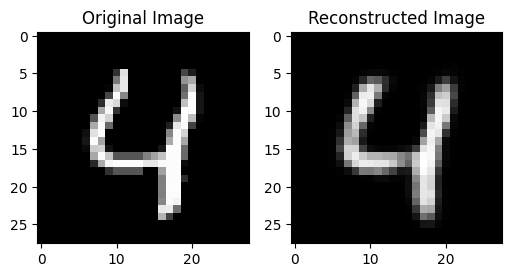

In [79]:
# DO NOT MODIFY
num_images = 5

for i in range(num_images):
    plt.figure(figsize=(6, 3))

    # Original image
    plt.subplot(1, 2, 1)
    plt.imshow(test_inputs[i, :, :], cmap="gray")
    plt.title("Original Image")

    # Reconstructed image
    plt.subplot(1, 2, 2)
    plt.imshow(test_outputs[i, :, :], cmap="gray")
    plt.title("Reconstructed Image")

    plt.show()

## Summary
*Briefly summarize your work for section 2 here, including things you have tried but have not worked*

I have just tried out an architecture for the decoder and encoder. However, the data set provided which was earlier used needed some rework especially as I will need to use the split function created. Different parameters have been tried as at the time of trying. I can suggest using a grid searchCv to carry out hyperparameter tuning but I have limitation in time.

I got validation loss of 0.00056 which is lower. I copied code from the previous exerxise to test and see and it looks better


In [82]:
#save the model from the second exercise

torch.save(model.state_dict(), 'advanced_autoencoder_model.pth')
print("model weights is saved")


model weights is saved


# Section 3 - Generate images from the autoencoder

In the final section, you will use your trained model from the previous section (or our pre-trained model, if you weren't able to complete the previous section) to sample images of hand-written digits given a digit in [0-9]. Specifically, you will implement the function `generate_image_from_digit(x: int, n_samples: int) -> NDArray[np.float32]` that returns an image. This function should sample images by sampling appropriate points in the $D_{latent}$-sized latent space and using the decoder to generate a new image for the digit. Every call to the function with the same digit should produce a different image.

**Expected time on this section: 30 minutes**<br>
**Maximum time on this section: 45 minutes**

In [84]:
# You should use the below pretrained model, if you weren't able to complete the previous section well.

# model = load_pretrained_model()

In [85]:
def generate_image_from_digit(digit: int, n_samples: int) -> NDArray[np.float32]:
  """
  Returns an RGB MNIST image (with values between [0, 255]) as a 3D NumPy array of dtype float32.
  """
  assert digit <= 9  and digit >= 0, "Digit must be between 0 and 9"
  # TODO: Write your implementation here
  return np.zeros((28, 28, 3), dtype=np.float32)

In [ ]:
def visualise_images(digit, n_samples):
  generated_images = generate_image_from_digit(digit, n_samples)
  for i in range(n_samples):
      plt.subplot(1, n_samples, i + 1)
      plt.imshow(generated_images[i], cmap='gray')
      plt.axis('off')

  plt.show()

for digit in range(10):
  visualise_images(digit, 2)

In [87]:
def check_generator_produces_different_images(digit):
    generated_images = [generate_image_from_digit(digit, 1) for _ in range(2)]
    return not torch.allclose(torch.from_numpy(generated_images[0]), torch.from_numpy(generated_images[1]))

In [ ]:
for digit in range(10):
  assert check_generator_produces_different_images(digit), "Generator must be able to produce different images for the same digit"

## Summary
*Briefly summarize your work for section 3 here*